In [178]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [179]:
# Read the wine dataset
dataset = load_wine()
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
df = df.assign(target=pd.Series(dataset['target']).values)

In [180]:
# Filter the irrelevant columns
df = df[['alcohol', 'magnesium', 'target']]
# Filter the irrelevant label
df = df[df.target != 0]

In [181]:
train_df, val_df = train_test_split(df, test_size=30, random_state=3)

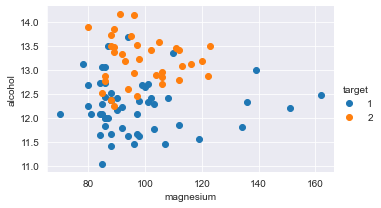

In [182]:
fg = sns.FacetGrid(data=train_df, hue='target', aspect=1.61)
fg.map(plt.scatter, 'magnesium','alcohol').add_legend()

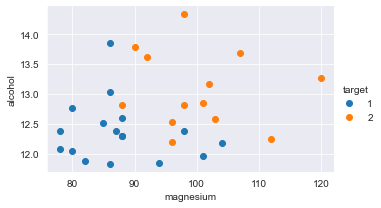

In [183]:
fg = sns.FacetGrid(data=val_df, hue='target', aspect=1.61)
fg.map(plt.scatter, 'magnesium','alcohol').add_legend()

In [184]:
from sklearn.svm import SVC # "Support vector classifier"
models = [SVC(kernel='linear', C=i) for i in [0.01,0.05,0.1]]
X_train = train_df[['alcohol','magnesium']]
y_train =train_df['target']
X_val = val_df[['alcohol','magnesium']]
y_val = val_df['target']
for model in models:
    model.fit(X_train, y_train)

In [185]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=50, linewidth=1, facecolors='none', edgecolor='black')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


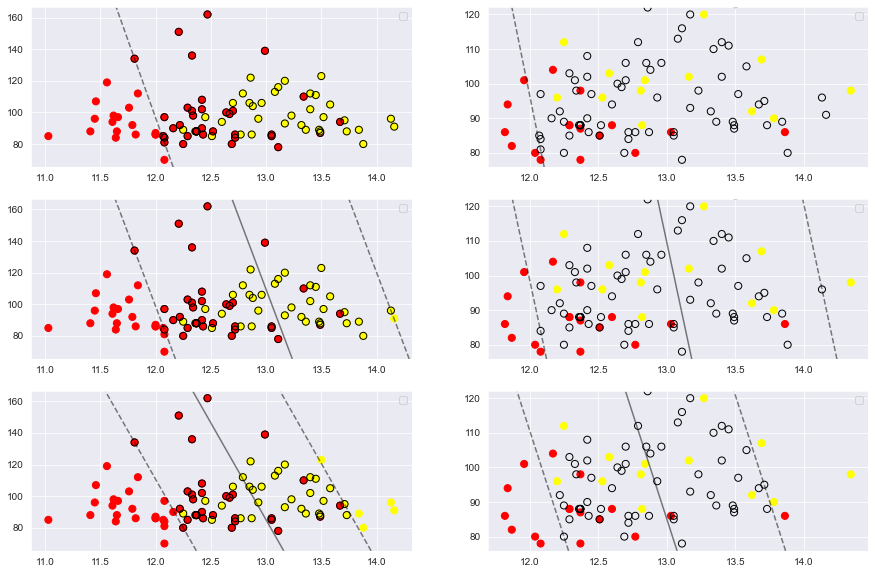

In [186]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
for i in range(3):
    for j in range(2):
        if j==0:
            axes[i][j].scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=50, cmap='autumn')
            plot_svc_decision_function(models[i], ax = axes[i][j])
            axes[i][j].legend()
        else:
            axes[i][j].scatter(X_val.iloc[:, 0], X_val.iloc[:, 1], c=y_val, s=50, cmap='autumn')
            plot_svc_decision_function(models[i],ax=axes[i][j])
            axes[i][j].legend()
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')



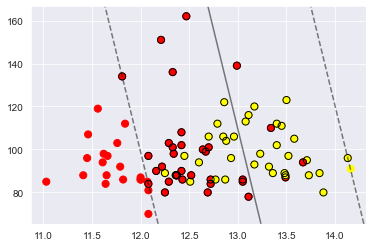

In [187]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(models[1])

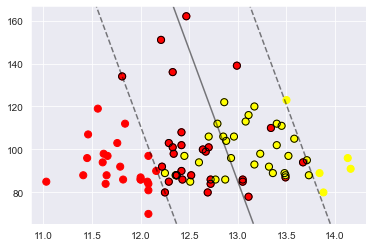

In [188]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(models[2])

question 1: using hard SVM on these datasets